# Dimensionality Reduction by PCA

## Learning Activity Q3

This notebook applies Principal Component Analysis (PCA) to the Iris dataset in order to reduce its dimensionality while preserving as much variance as possible. The transformed data is then visualized in a scatter plot to see how effectively PCA separates the different species of iris flowers.


In [15]:
import pandas as pd
import numpy as np

#a.
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


## Loading the Iris Dataset and Data Preprocessing

The Iris dataset is loaded from scikit-learn.
Before applying PCA, the data is scaled so that each feature has a mean of 0 and a standard deviation of 1.
Standardization is required because PCA is sensative to the scale of the variables.


In [16]:
#b.
#loading the Iris dataset in
iris = load_iris()
print(iris)

#Features (measurements)
X = iris.data

#Labels (species)
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Principal Component Analysis (PCA)

PCA transforms the standardized data into a new coordinate system where the first component (PC1) captures the greatest amount of variance. The second component (PC2) captures the next greatest amount of variance. 
2 components were chosen in order to visualize the data in 2 dimension (x-y graph).

In [17]:
#c.
from sklearn.decomposition import PCA

#Apply PCA with 2 components (for visualization)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

## Explained Variance

The explained variance ratio indicates how much of the original data variance is captured by each principal component.
The total variance explained by the selected componentshelps determine how effective the dimensionality reduction was.

In [18]:
#d.
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.72962445 0.22850762]
Total variance explained: 0.9581320720000164


## Visualization of PCA Results in a scatter plot

The scatter plot below shows the Iris dataset projected onto the first two principal components.
Each point represents a flower, and colors indicate different species.

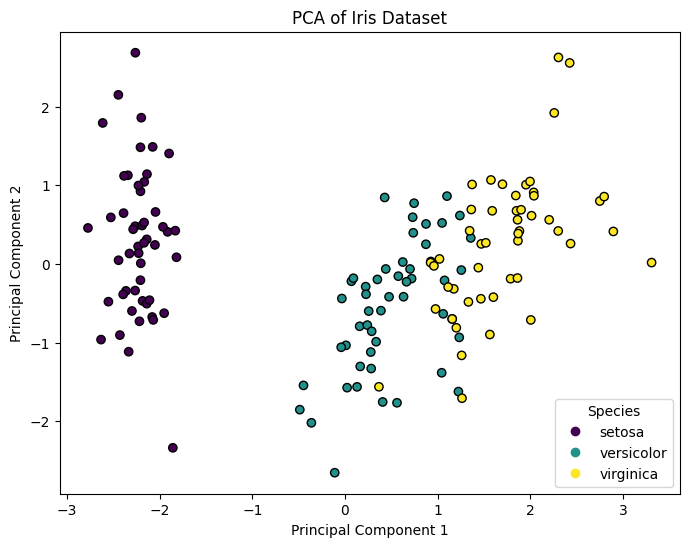

In [21]:
#e.
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
scatter = plt.scatter(
    X_pca[:, 0], #PC1 value
    X_pca[:,1], #PC2 value
    c=y,
    cmap = "viridis",
    edgecolor = "k"
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")

handles, labels = scatter.legend_elements()
plt.legend(
    handles,
    iris.target_names,
    title="Species"
)

plt.show()

## Interpretation of Results

The scatter plot shows clear separation between the Iris species after dimensionality reduction.
Setosa is separated from the other two species.
Versicolor and Virginica show some overlap, but are still partically distinguishable.

The two principal components together explain a large proportion of the total variance, indicating that PCA successfully preserves the variance of the original data despite reducing the dimensionality from four features to two.

This demonstrates that PCA is an effective technique for visualization and dimensionality reduction in datasets with correlated features.